## HOMEWORK DATA VISUALITAZION 
## MICHELE CIBELLI
## 750931

In [1]:
#Importing the libraries that we need to work on the homework

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
#Importing the dataset and dataset's visualization
dataset = pd.read_csv('C:\\Users\\miche\\OneDrive\\Desktop\\Datavisualization\\Homework\\healthy_lifestyle_city_2021.csv')
dataset


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


## (a) Check if the dataset has missing values and choose a way to correct them. Motivate your choice.

In [3]:
#Replacing the Nan values
dataset.replace('-',np.NaN,inplace=True)

missing_value = dataset.isnull()
missing_value.head()
for column in missing_value.columns.values.tolist():
    print(column)
    print(missing_value[column].value_counts())
    print(" ")
    
#Replacing these two values with the ones that you can find over the web about that particular cities    
dataset.at[19,'Sunshine hours(City)']= 1830
dataset.at[6,'Pollution(Index score) (City)']= 68

#Replacing the others missing values with the median, it seems to work good with these type of choice
median = dataset.median(skipna=True).astype(int)
dataset = dataset.fillna(median['Annual avg. hours worked'])

#Introducing the substitution of strings with floats
dataset = dataset.astype({"Annual avg. hours worked": float , "Sunshine hours(City)": int , "Pollution(Index score) (City)": float })

dataset = dataset.copy()
dataset['Cost of a bottle of water(City)'] = dataset['Cost of a bottle of water(City)'].apply(lambda x: x.replace('£', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

dataset['Cost of a monthly gym membership(City)'] = dataset['Cost of a monthly gym membership(City)'].apply(lambda x: x.replace('£', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

dataset['Obesity levels(Country)'] = dataset['Obesity levels(Country)'].apply(lambda x: x.replace('%', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

median = dataset.median(skipna=True).astype(int)
dataset = dataset.fillna(median['Annual avg. hours worked'])

City
False    44
Name: City, dtype: int64
 
Rank
False    44
Name: Rank, dtype: int64
 
Sunshine hours(City)
False    43
True      1
Name: Sunshine hours(City), dtype: int64
 
Cost of a bottle of water(City)
False    44
Name: Cost of a bottle of water(City), dtype: int64
 
Obesity levels(Country)
False    44
Name: Obesity levels(Country), dtype: int64
 
Life expectancy(years) (Country)
False    44
Name: Life expectancy(years) (Country), dtype: int64
 
Pollution(Index score) (City)
False    43
True      1
Name: Pollution(Index score) (City), dtype: int64
 
Annual avg. hours worked
False    33
True     11
Name: Annual avg. hours worked, dtype: int64
 
Happiness levels(Country)
False    44
Name: Happiness levels(Country), dtype: int64
 
Outdoor activities(City)
False    44
Name: Outdoor activities(City), dtype: int64
 
Number of take out places(City)
False    44
Name: Number of take out places(City), dtype: int64
 
Cost of a monthly gym membership(City)
False    44
Name: Cost of a monthly

## (b) Plot a bar chart describing the Happiness levels for each city. The bars should be colored in gray except for the bars corresponding to Italian cities which should be colored in dark blue

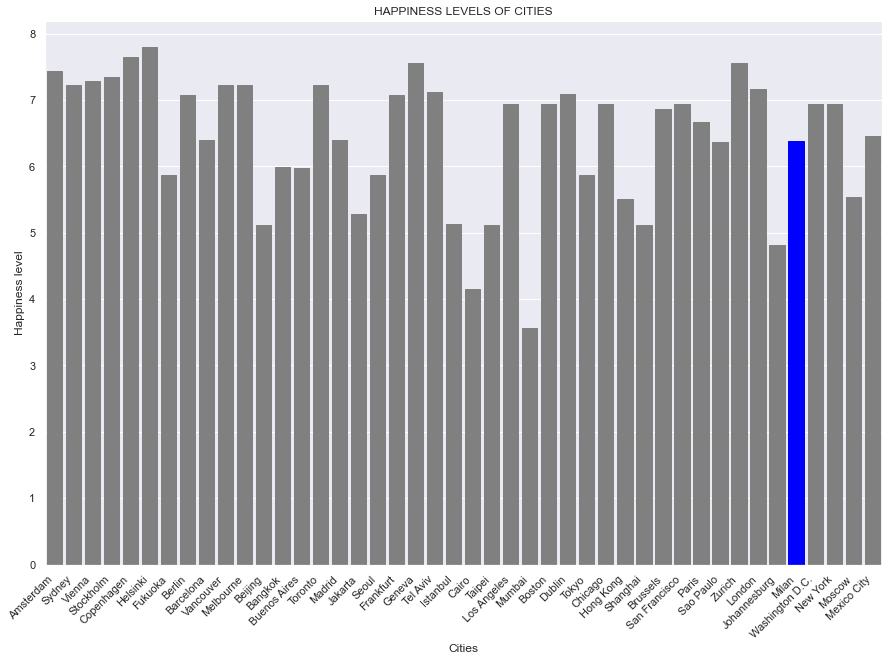

In [4]:
#Adjusting the size of the bar plot
plt.figure(figsize=(15, 10))

#Creation of the barplot
barplot = sns.barplot(x = "City", y = "Happiness levels(Country)", data = dataset, color = "grey")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 45, horizontalalignment = "right")
barplot.set(title = "HAPPINESS LEVELS OF CITIES")
barplot.set_ylabel("Happiness level")
barplot.set_xlabel("Cities")

#Putting the Italian Cities in Blue, the only one is Milan 
for bar in barplot.patches:
    if bar.get_height() == 6.38:
        bar.set_color('blue')    
    else:
        bar.set_color('grey')
        

## (c) Plot the correlation between any two pair of variables as a heatmap with a custom palette. What can you say about the result?

Text(0.5, 1.0, 'Correlation Heatmap')

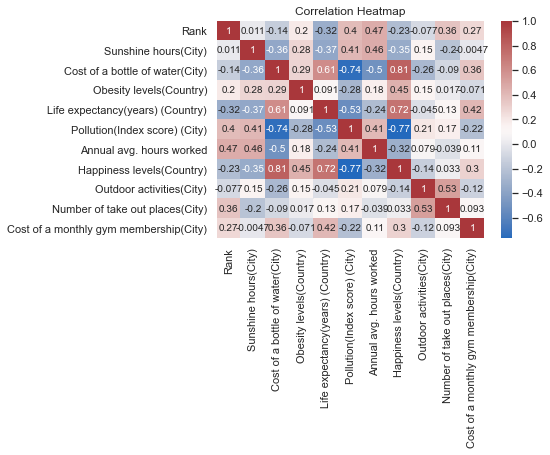

In [5]:
#Creating the correlation Heatmap
correlation = sns.cubehelix_palette(start=2, rot=0, as_cmap=True)
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap='vlag')
heatmap.set_title('Correlation Heatmap')

#From this heatmap it's possible to see the high correlation between the cost of a bottle of water and the happiness level that is equal to 0.81, but it doesn't make to much sense.
#Otherwise is important the second most high correlation between the life expectancy and the happiness level, because it seems more real that people that lives in cities/country with an higher level of life expectancy, could be more happy about this situation

## (d) Divide the cities into 6 groups based on the first letter of their name (A-D, E-H, I-L, M-P, Q-U, V-Z). Plot a bar chart for the “Number of take out places” variable with six bins (A-D, E-H, I-L, M-P, Q-U, V-Z). Each bin contains the sum of the values of “Number of take out places” for the cities that fall in that bin

In [6]:
# Now we create a new dataset, that is equal to the first, except for the alphabetical order of the cities, that we're going to fit with these 2 lines of code
dataset2 = dataset.sort_values('City', ignore_index = True)
dataset2.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Bangkok,13,2624,0.22,10.0,74.1,76.64,1686.0,5.99,377,1796,50.03
2,Barcelona,9,2591,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80
3,Beijing,12,2671,0.26,6.2,75.4,85.43,1686.0,5.12,223,261,38.62
4,Berlin,8,1626,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11


In [7]:
#We divided the cities into 6 groups based on the number position of dataset2
A_D = dataset2.loc[ :11, ['City', 'Number of take out places(City)']]
E_H = dataset2.loc[12:16, ['City', 'Number of take out places(City)']]
I_L = dataset2.loc[17:21, ['City', 'Number of take out places(City)']]
M_P = dataset2.loc[22:29, ['City', 'Number of take out places(City)']]
Q_U = dataset2.loc[30:39, ['City', 'Number of take out places(City)']]
V_Z = dataset2.loc[40:, ['City', 'Number of take out places(City)']]

#First of all we sum up all the cities in groups based on the first letter, then we put together the sum of the number of take out places of the splitted cities
A_D_sum = A_D["Number of take out places(City)"].sum()
E_H_sum = E_H["Number of take out places(City)"].sum()
I_L_sum = I_L["Number of take out places(City)"].sum()
M_P_sum = M_P["Number of take out places(City)"].sum()
Q_U_sum = Q_U["Number of take out places(City)"].sum()
V_Z_sum = V_Z["Number of take out places(City)"].sum()

#Creating the new third dataset with the cities grouping based on the first character and the other sums of the number of take out places
dataset3 = pd.DataFrame({"City" : ["A_D","E_H","I_L","M_P","Q_U","V_Z"], "Number of take out places(City)" : [A_D_sum,E_H_sum,I_L_sum,M_P_sum,Q_U_sum,V_Z_sum]})
dataset3

,City,Number of take out places(City)
0,A_D,12941
1,E_H,3100
2,I_L,10115
3,M_P,18846
4,Q_U,15417
5,V_Z,3078


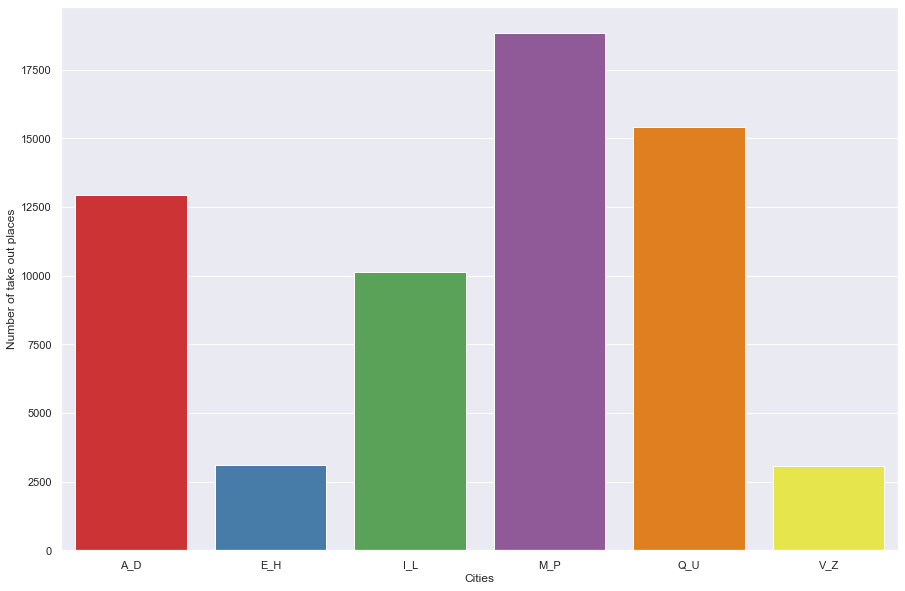

In [8]:
#Creating the barplot as the request, we prefer the set1 palette because the other will not have too much brightness and visibility
plt.figure(figsize=(15,10))
barplot2 = sns.barplot(x = "City", y = "Number of take out places(City)", data = dataset3, palette="Set1")
barplot2.set_ylabel("Number of take out places")
barplot2.set_xlabel("Cities")
sns.set_style("whitegrid")

## (e) Plot the graphics as described in Figure 1

<AxesSubplot:title={'center':'Chart8'}, xlabel='Pollution(Index score) (City)', ylabel='Count'>

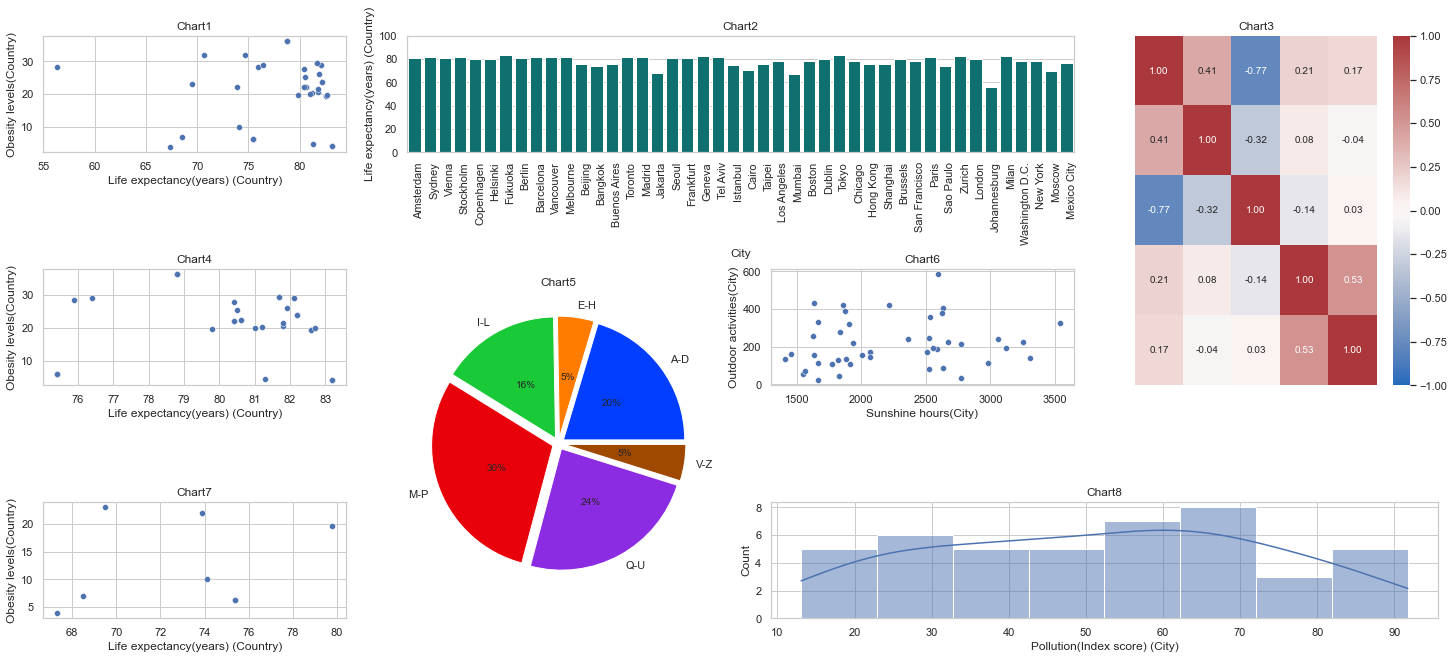

In [13]:
#Chart1 = Scatterplot of Life Expectancy vs Obesity Levels
#Chart2 = Bar plot of Life Expectancy with non increasing lenght order of the bars 
#Chart3 = Heatmap showing the correlation between the last 5 variables
#Chart4 = Same as chart 1 but with values of Life Expectancy < 75
#Chart5 = Pie Chart of our choice, relation between the cities splitted by the first letter and sum of number of take out places
#Chart6 = Scatterplot of Sunshine hours vs Outdoor activities
#Chart7 = Same as chart 1 and chart 5 with values of Life Expectancy < 80 and Obesity Levels < 25%
#Chart8 = Histogram as a chart of our choice

fig = plt.figure(figsize=(25,15), constrained_layout=True)
fig.subplots_adjust(hspace = 1)

fig_ax1 = plt.subplot2grid(shape=(4, 4), loc=(0, 0))
fig_ax1.set_title('Chart1')
fig_ax1 = sns.scatterplot(data = dataset, x = 'Life expectancy(years) (Country)', y = 'Obesity levels(Country)')

fig_ax2 = plt.subplot2grid(shape=(4, 4), loc=(0, 1), colspan=2)
fig_ax2.set_title('Chart2')
fig_ax2.set_ylabel('Life Expectancy')
fig_ax2.set_ylim(0,100)
fig_ax2.set_xticklabels(fig_ax2.get_xticklabels(), rotation = 90, horizontalalignment = 'left')
fig_ax2 = sns.barplot(x ='City', y ='Life expectancy(years) (Country)', data = dataset, color = "#008080")

fig_ax3 = plt.subplot2grid(shape=(4, 4), loc=(0,3), rowspan=2)
fig_ax3.set_title('Chart3')
sns.heatmap(dataset.iloc[:, 6:11].corr(), vmin=-1, vmax=1, annot=True, fmt='2.2f', cmap = 'vlag', xticklabels = False, yticklabels = False)

fig_ax4 = plt.subplot2grid(shape=(4, 4), loc=(1, 0))
fig_ax4.set_title('Chart4')
dataset5 = dataset
dataset5 = dataset5[dataset5['Life expectancy(years) (Country)'] > 75]
sns.scatterplot(data = dataset5, x = 'Life expectancy(years) (Country)', y = 'Obesity levels(Country)')

fig_ax5 = plt.subplot2grid(shape=(4, 4), loc=(1, 1), rowspan=2)
fig_ax5.set_title('Chart5')
dfe = dataset3.drop(['City'], axis = 1) 
colors = sns.color_palette('bright')[0:6]
index = ['A-D', 'E-H', 'I-L', 'M-P', 'Q-U', 'V-Z']
plt.pie(dfe['Number of take out places(City)'], labels = index, colors = colors, autopct='%.0f%%', explode=[0.05]*6, pctdistance=0.5)

fig_ax6 = plt.subplot2grid(shape=(4, 4), loc=(1, 2), colspan=1)
fig_ax6.set_title('Chart6')
sns.scatterplot(data = dataset, x = 'Sunshine hours(City)', y = 'Outdoor activities(City)')

fig_ax7 = plt.subplot2grid(shape=(4, 4), loc=(2, 0))
fig_ax7.set_title('Chart7')
dataset6 = dataset
dataset6 = dataset6[dataset6['Life expectancy(years) (Country)'] < 80]
dataset6 = dataset6[dataset6['Obesity levels(Country)'] < 25]
fig_ax7 = sns.scatterplot(x='Life expectancy(years) (Country)', y = 'Obesity levels(Country)', data = dataset6)


fig_ax8 = plt.subplot2grid(shape=(4, 4), loc=(2, 2), colspan=2)
fig_ax8.set_title('Chart8')
sns.histplot(x = 'Pollution(Index score) (City)', data = dataset, kde=True, bins=8)



